In [ ]:
%pip install gensim

In [ ]:
from gensim.models import KeyedVectors

In [ ]:
#install and unzip https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM
#then place bin model into the same directory as this notebook
#Then execute this code to Load Google's pre-trained Word2Vec model
path = "GoogleNews-vectors-negative300.bin"
model = KeyedVectors.load_word2vec_format(path, binary=True, limit=200000)
# model = KeyedVectors.load_word2vec_format(path, binary=True)
print("vocab_size:", len(model.key_to_index))

vocab_size: 200000


In [ ]:
model.most_similar('king',topn=10)

[('kings', 0.7138045430183411),
 ('queen', 0.6510956883430481),
 ('monarch', 0.6413194537162781),
 ('crown_prince', 0.6204220056533813),
 ('prince', 0.6159993410110474),
 ('sultan', 0.5864824056625366),
 ('ruler', 0.5797567367553711),
 ('princes', 0.5646552443504333),
 ('throne', 0.5422105193138123),
 ('royal', 0.5239794254302979)]

In [14]:
model.doesnt_match("breakfast cereal dinner lunch".split())

'cereal'

In [19]:
model.most_similar(positive=["woman", "king"], negative=["man"], topn=1)

[('queen', 0.7118193507194519)]

In [ ]:
# print(model["loves"])
print(model["loves"].shape)
print(type(model["loves"]))
print(model["loves"])

(300,)
<class 'numpy.ndarray'>


In [2]:
%pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


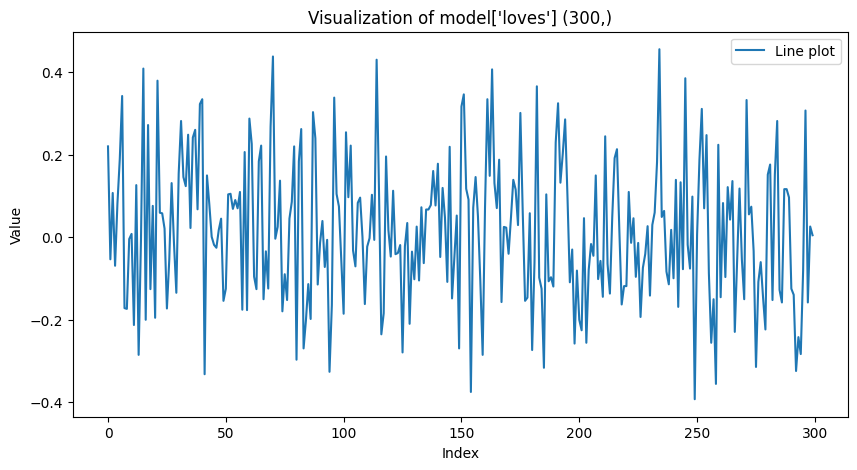

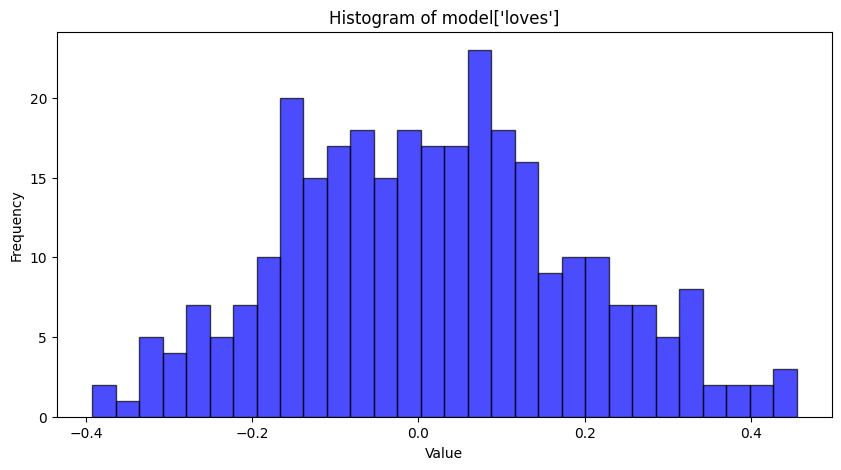

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming model["loves"] is the 1D numpy array with shape (300,)
data = model["loves"]

# Plotting the data
plt.figure(figsize=(10, 5))

# Line plot
plt.plot(data, label="Line plot")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Visualization of model['loves'] (300,)")
plt.legend()
plt.show()

# Alternatively, for a histogram to see distribution
plt.figure(figsize=(10, 5))
plt.hist(data, bins=30, alpha=0.7, color="blue", edgecolor="black")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of model['loves']")
plt.show()

In [4]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


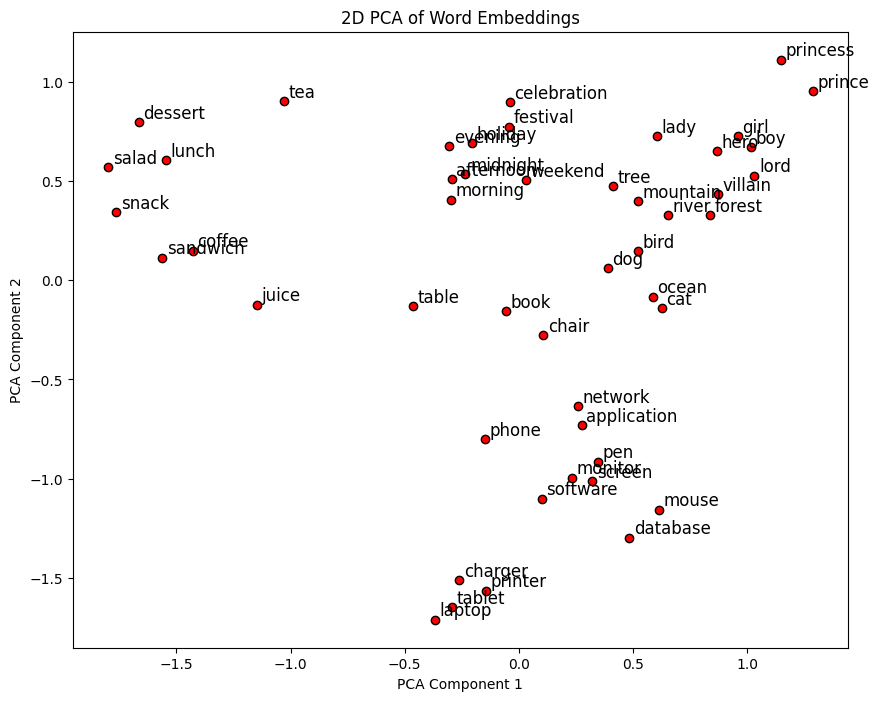

In [ ]:


# %%
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# %%
# Load Google's pre-trained Word2Vec model with a limited vocabulary for efficiency
path = "GoogleNews-vectors-negative300.bin"
model = KeyedVectors.load_word2vec_format(path, binary=True, limit=200000)

# %%
# Visualize word vectors for some common words
# words = ["king", "queen", "man", "woman", "apple", "orange", "breakfast", "dinner", "computer", "keyboard"]
words = [
    # People & Roles
    "prince",
    "princess",
    "lord",
    "lady",
    "boy",
    "girl",
    "hero",
    "villain",
    # Objects & Everyday Items
    "mouse",
    "screen",
    "tablet",
    "phone",
    "book",
    "pen",
    "chair",
    "table",
    # Food & Meals
    "lunch",
    "snack",
    "dessert",
    "coffee",
    "tea",
    "juice",
    "sandwich",
    "salad",
    # Technology & Tools
    "monitor",
    "laptop",
    "charger",
    "software",
    "network",
    "application",
    "printer",
    "database",
    # Nature & Animals
    "mountain",
    "river",
    "ocean",
    "forest",
    "dog",
    "cat",
    "bird",
    "tree",
    # Time & Events
    "morning",
    "afternoon",
    "evening",
    "midnight",
    "festival",
    "celebration",
    "holiday",
    "weekend",
]

word_vectors = np.array([model[word] for word in words])

# Reduce dimensionality for visualization with PCA
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# Plotting the words
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], edgecolors='k', c='r')

for i, word in enumerate(words):
    plt.text(word_vectors_2d[i, 0] + 0.02, word_vectors_2d[i, 1] + 0.02, word, fontsize=12)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("2D PCA of Word Embeddings")
plt.show()

In [5]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from gensim.models import KeyedVectors
import numpy as np
from sklearn.decomposition import PCA
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# %%
# Load Google's pre-trained Word2Vec model with a limited vocabulary for efficiency
path = "GoogleNews-vectors-negative300.bin"
model = KeyedVectors.load_word2vec_format(path, binary=True, limit=200000)

# %%
# Select words to visualize
words = [
    # People & Roles
    "prince",
    "princess",
    "lord",
    "lady",
    "boy",
    "girl",
    "hero",
    "villain",
    # Objects & Everyday Items
    "mouse",
    "screen",
    "tablet",
    "phone",
    "book",
    "pen",
    "chair",
    "table",
    # Food & Meals
    "lunch",
    "snack",
    "dessert",
    "coffee",
    "tea",
    "juice",
    "sandwich",
    "salad",
    # Technology & Tools
    "monitor",
    "laptop",
    "charger",
    "software",
    "network",
    "application",
    "printer",
    "database",
    # Nature & Animals
    "mountain",
    "river",
    "ocean",
    "forest",
    "dog",
    "cat",
    "bird",
    "tree",
    # Time & Events
    "morning",
    "afternoon",
    "evening",
    "midnight",
    "festival",
    "celebration",
    "holiday",
    "weekend",
]

# Extract the word vectors
word_vectors = np.array([model[word] for word in words])

# Reduce dimensionality to 3D for visualization
pca = PCA(n_components=3)
word_vectors_3d = pca.fit_transform(word_vectors)

# Create a 3D scatter plot with plotly
fig = make_subplots(specs=[[{"type": "scatter3d"}]])

scatter = go.Scatter3d(
    x=word_vectors_3d[:, 0], y=word_vectors_3d[:, 1], z=word_vectors_3d[:, 2], mode="markers+text", marker=dict(size=5, color="blue", opacity=0.8), text=words, textposition="top center"
)

fig.add_trace(scatter)

# Set the layout for better visualization without axis lines
fig.update_layout(
    title="3D PCA of Word Embeddings",
    scene=dict(
        xaxis_title="PCA Component 1",
        yaxis_title="PCA Component 2",
        zaxis_title="PCA Component 3",
        xaxis=dict(showgrid=True, showticklabels=False,   title=''),  # Hide x-axis
        yaxis=dict(showgrid=True, showticklabels=False,   title=''),  # Hide y-axis
        zaxis=dict(showgrid=True, showticklabels=False,   title=''),  # Hide z-axis
    ),
    width=800,
    height=700,
    showlegend=False
)

# Display the interactive 3D plot
fig.show()